In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_json('../../dataset/News_Category_Dataset_v3.json', lines=True)

In [3]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [4]:
unique_categories = df['category'].unique()
unique_categories

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   link                209527 non-null  object        
 1   headline            209527 non-null  object        
 2   category            209527 non-null  object        
 3   short_description   209527 non-null  object        
 4   authors             209527 non-null  object        
 5   date                209527 non-null  datetime64[ns]
 6   predicted_category  209527 non-null  object        
 7   is_correct          209527 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(6)
memory usage: 11.4+ MB


In [5]:
top_10_categories = df['category'].value_counts().nlargest(10).index

In [6]:
top_10_categories

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS'],
      dtype='object', name='category')

In [7]:
filtered_df = df[df['category'].isin(top_10_categories)]

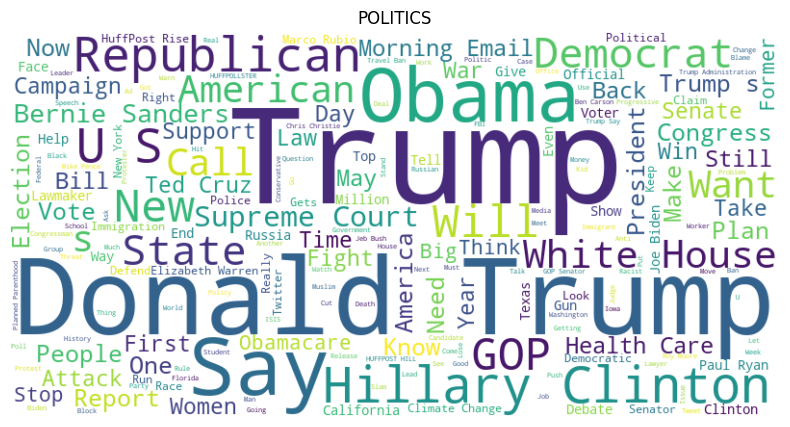

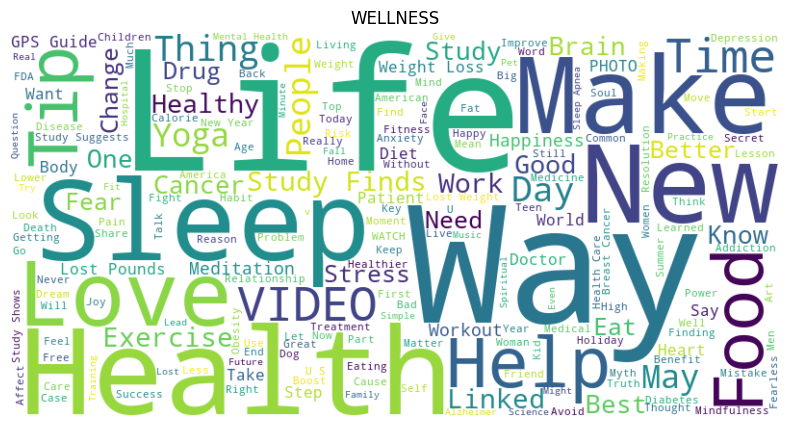

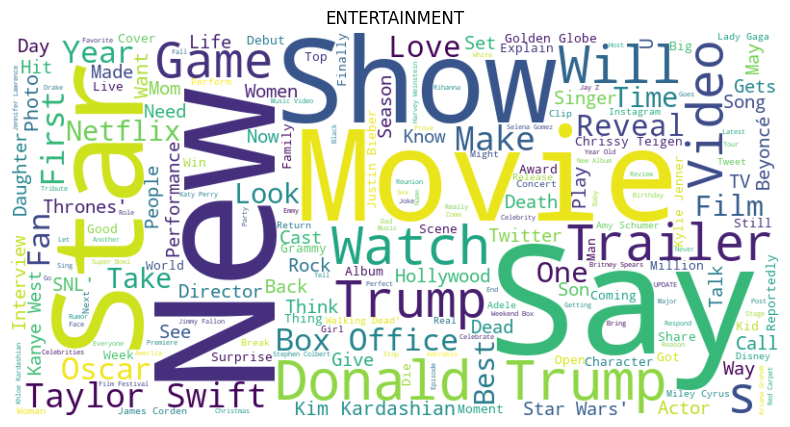

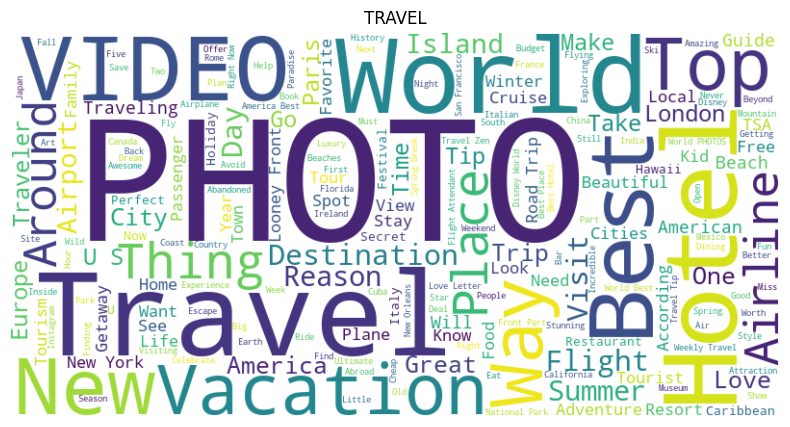

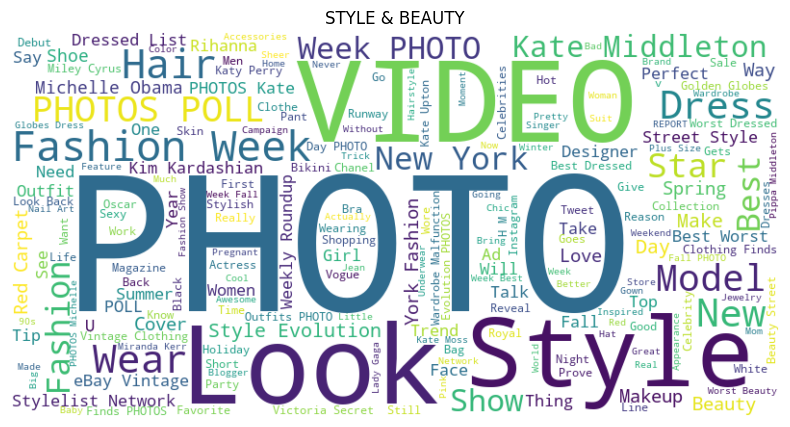

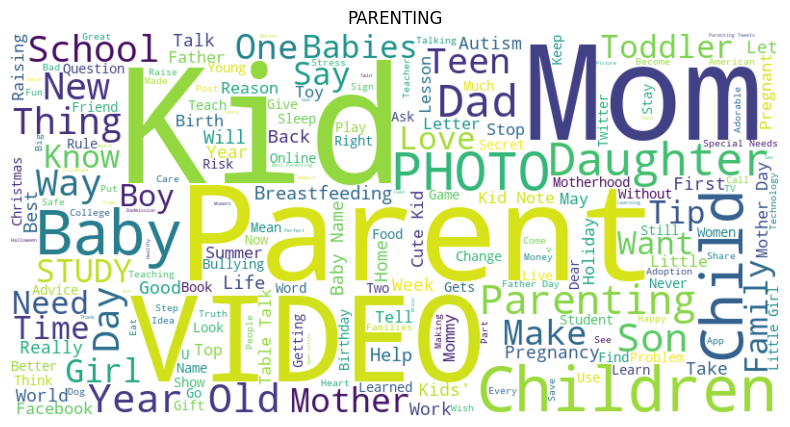

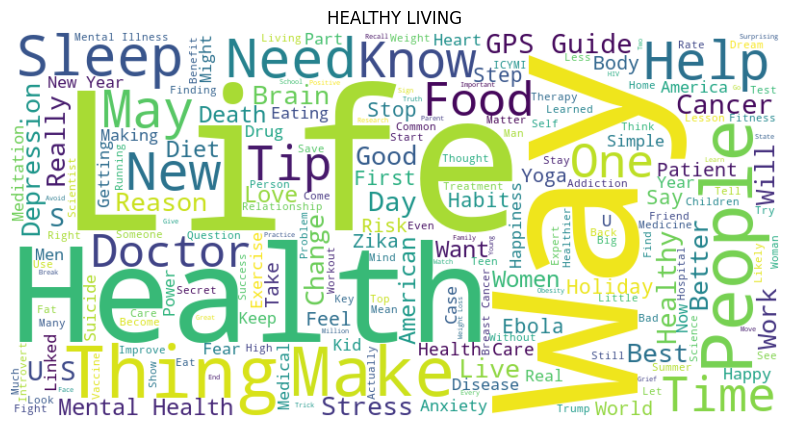

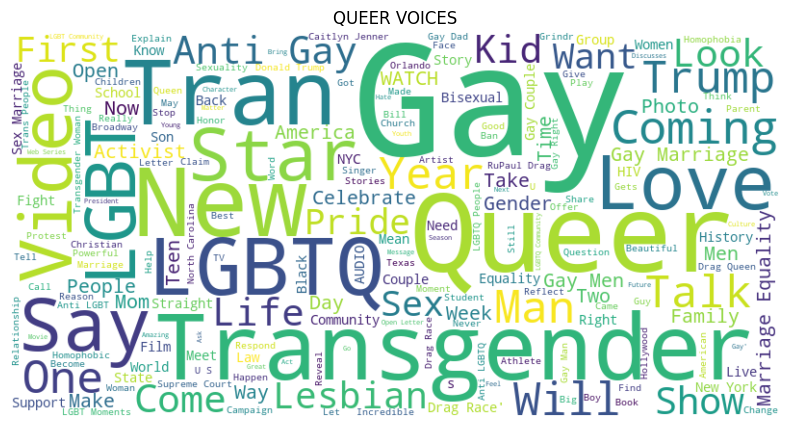

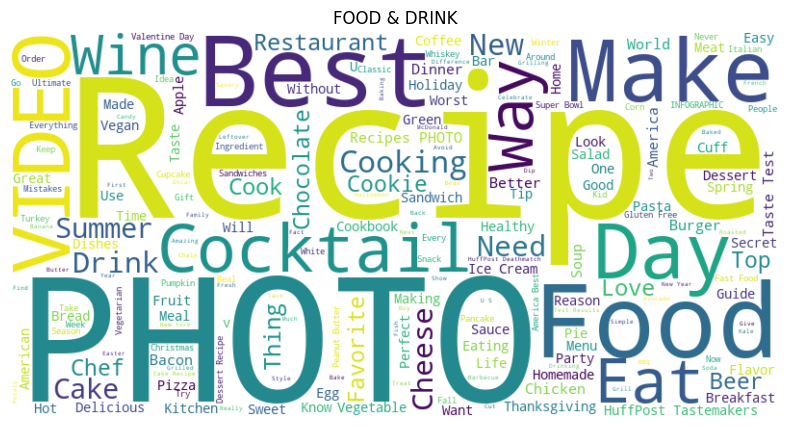

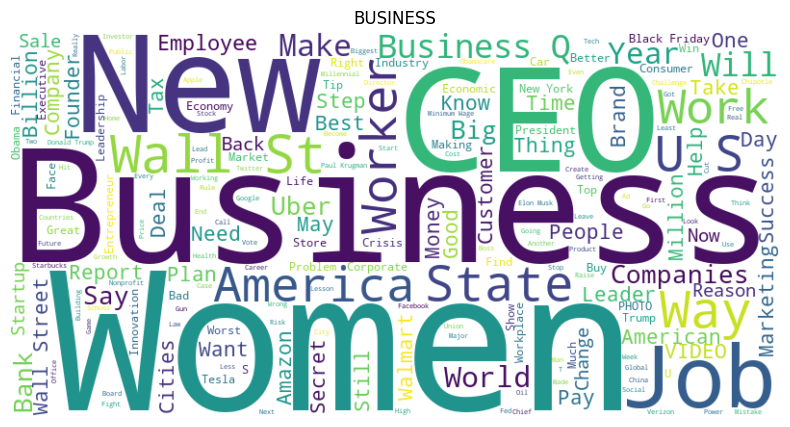

In [8]:
for category in top_10_categories:
    category_df = df[df['category'] == category]
    
    text = " ".join(headline for headline in category_df['headline'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(category)
    plt.show()

In [9]:
import pandas as pd
import zipfile
import os
from collections import defaultdict, Counter
from wordcloud import STOPWORDS

def clean_text(text):
    return ' '.join(word for word in text.split() if word.lower() not in STOPWORDS)

In [10]:
# Function to create a dictionary of the top 100 most common words in their relevant category
def create_category_word_dict(df, categories, top_n=100000):
    category_words = defaultdict(set)

    for category in categories:
        # Filter the dataframe for the current category
        category_df = df[df['category'] == category]
        
        # Clean the headlines and combine all words into a single list
        headlines = category_df['headline'].dropna().apply(clean_text).values
        all_words = ' '.join(headlines).split()
        
        # Count the occurrences of each word
        word_counts = Counter(all_words)
        
        # Get the top_n most common words
        most_common_words = word_counts.most_common(top_n)
        
        # Add words to the dictionary for the current category
        for word, count in most_common_words:
            category_words[category].add(word)
    
    return category_words

# Create the dictionary for the top 10 categories
category_word_dict = create_category_word_dict(df, top_10_categories)


In [11]:
category_word_dict['BUSINESS']

{'Pearl',
 'Adviser:',
 'Volunteering',
 'Healing',
 "'Hazed",
 'List,',
 'Trailer',
 'Tolerate',
 'Bottle',
 "Schilling's",
 'Claim',
 'Upwards',
 'World)',
 'Pro-Gun',
 'Challenge!',
 "Reserve's",
 'Maggie',
 'Jared',
 'Renee',
 'One-Month',
 "Siege'",
 'Ketchup,',
 'Spitzer:',
 "'Stifle",
 'Steal,',
 'Deficit',
 'Kuan',
 'Anastasiades',
 'Suggesting',
 'Taxes.',
 'Letting',
 'Bechtel',
 'Universal',
 'Hygiene',
 'Farina',
 'Charleston',
 'Decline,',
 'Responsiveness',
 'Voris',
 '292,000',
 'Meeting:',
 'Disability:',
 'Affected',
 'Pink',
 'Firing',
 'Now',
 'Low,',
 'Spirit',
 'Begins',
 'Landscape',
 "Nike's",
 'United',
 'Blocked',
 'Testimony:',
 'Bubble',
 "Ikea's",
 'Yet?',
 'Boring.',
 'Fiduciary',
 '2013',
 'Banning',
 'ABLE',
 'Couture',
 'Connecting',
 'Mike',
 'Buffalo',
 'Won',
 'Enabled',
 'Red',
 'Creativity',
 '2)',
 'Snarky',
 'Hurts',
 'Sells',
 '47',
 'Waiters',
 'Illnesses',
 'Republic',
 'Slapping',
 'Manipulation',
 'Danone',
 'Grotesque',
 "Macy's",
 'Haul',
 

In [12]:
# Function to count word matches for each category
def count_word_matches(headline, category_word_dict):
    cleaned_headline = clean_text(headline)
    word_list = cleaned_headline.split()
    category_scores = {category: sum(1 for word in word_list if word in words) for category, words in category_word_dict.items()}
    return category_scores

In [13]:
predicted_categories = []
for headline in df['headline']:
    word_match_counts = count_word_matches(headline, category_word_dict)
    predicted_category = max(word_match_counts, key=word_match_counts.get)
    predicted_categories.append(predicted_category)

In [14]:
count_word_matches(df['headline'][1], category_word_dict)

{'POLITICS': 9,
 'WELLNESS': 6,
 'ENTERTAINMENT': 7,
 'TRAVEL': 9,
 'STYLE & BEAUTY': 6,
 'PARENTING': 7,
 'HEALTHY LIVING': 6,
 'QUEER VOICES': 7,
 'FOOD & DRINK': 6,
 'BUSINESS': 6}

In [15]:
# Add the predicted categories to the dataframe
df['predicted_category'] = predicted_categories


In [16]:
# Calculate accuracy and error percentage
df['is_correct'] = df['category'] == df['predicted_category']
accuracy = df['is_correct'].mean() * 100
error_percentage = (1 - df['is_correct'].mean()) * 100

In [17]:
error_percentage

55.886353548707326